In [33]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()
print("Pclass distribution:\n",    df['Pclass'].value_counts(), "\n")
print("Sex distribution:\n",       df['Sex'].value_counts(),    "\n")
print("Embarked distribution:\n",  df['Embarked'].value_counts(),"\n")

df = pd.read_csv('train.csv').copy()

median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

df = df.drop(columns='Cabin')

print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Pclass distribution:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

Sex distribution:
 Sex
male      577
female    314
Name: count, dtype: int64 

Embarked distribution:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: i

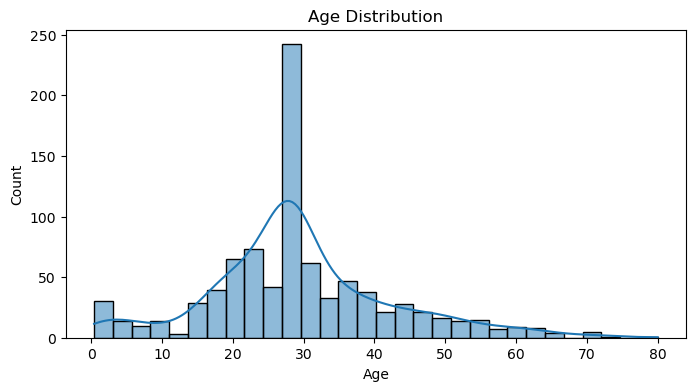

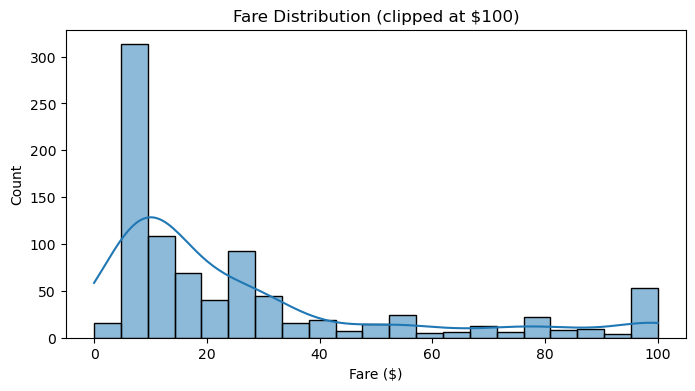

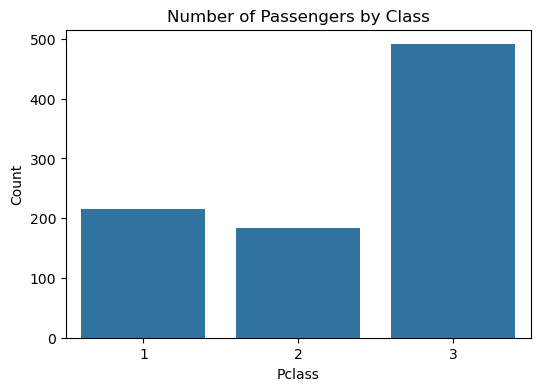

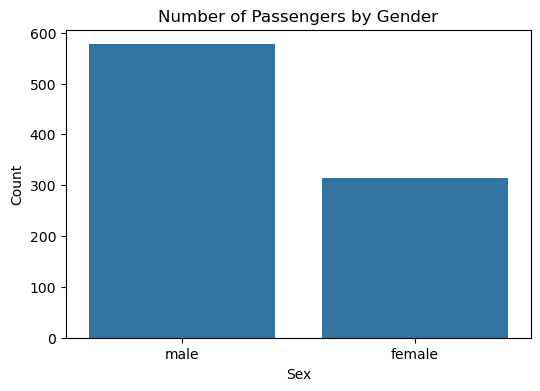

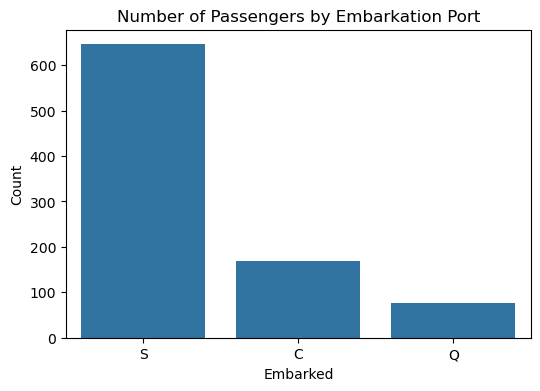

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['Fare'].clip(upper=100), kde=True)
plt.title('Fare Distribution (clipped at $100)')
plt.xlabel('Fare ($)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title('Number of Passengers by Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title('Number of Passengers by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', data=df)
plt.title('Number of Passengers by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


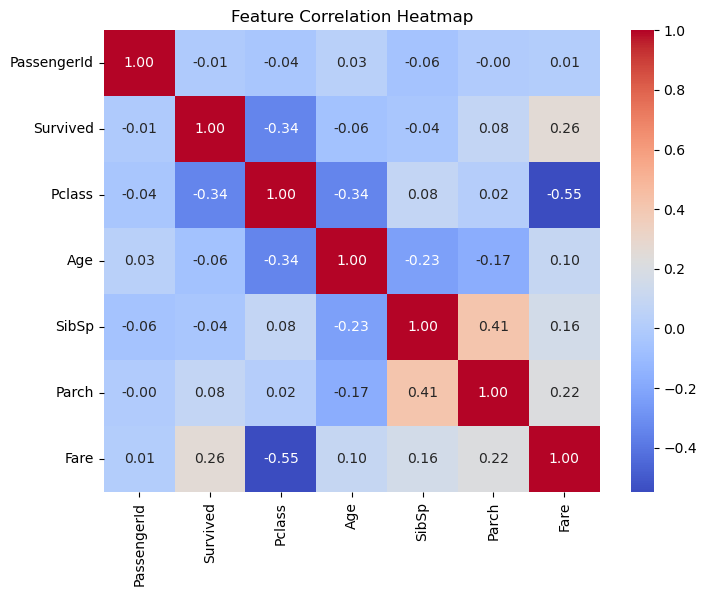

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


# KEY RELATIONSHIPS AND TRENDS

### Survived ↔ Fare (+0.26): Higher-paying passengers had better survival odds.
### Survived ↔ Pclass (–0.34): First-class travelers were more likely to survive.
### Fare ↔ Pclass (–0.55): Lower class number (higher class) paid substantially more.
### SibSp ↔ Parch (+0.41): Passengers traveling with siblings/spouses often had parents/children aboard.
### Age: Very weak link to survival (–0.06) but shows moderate inverse relation to Pclass (–0.34).

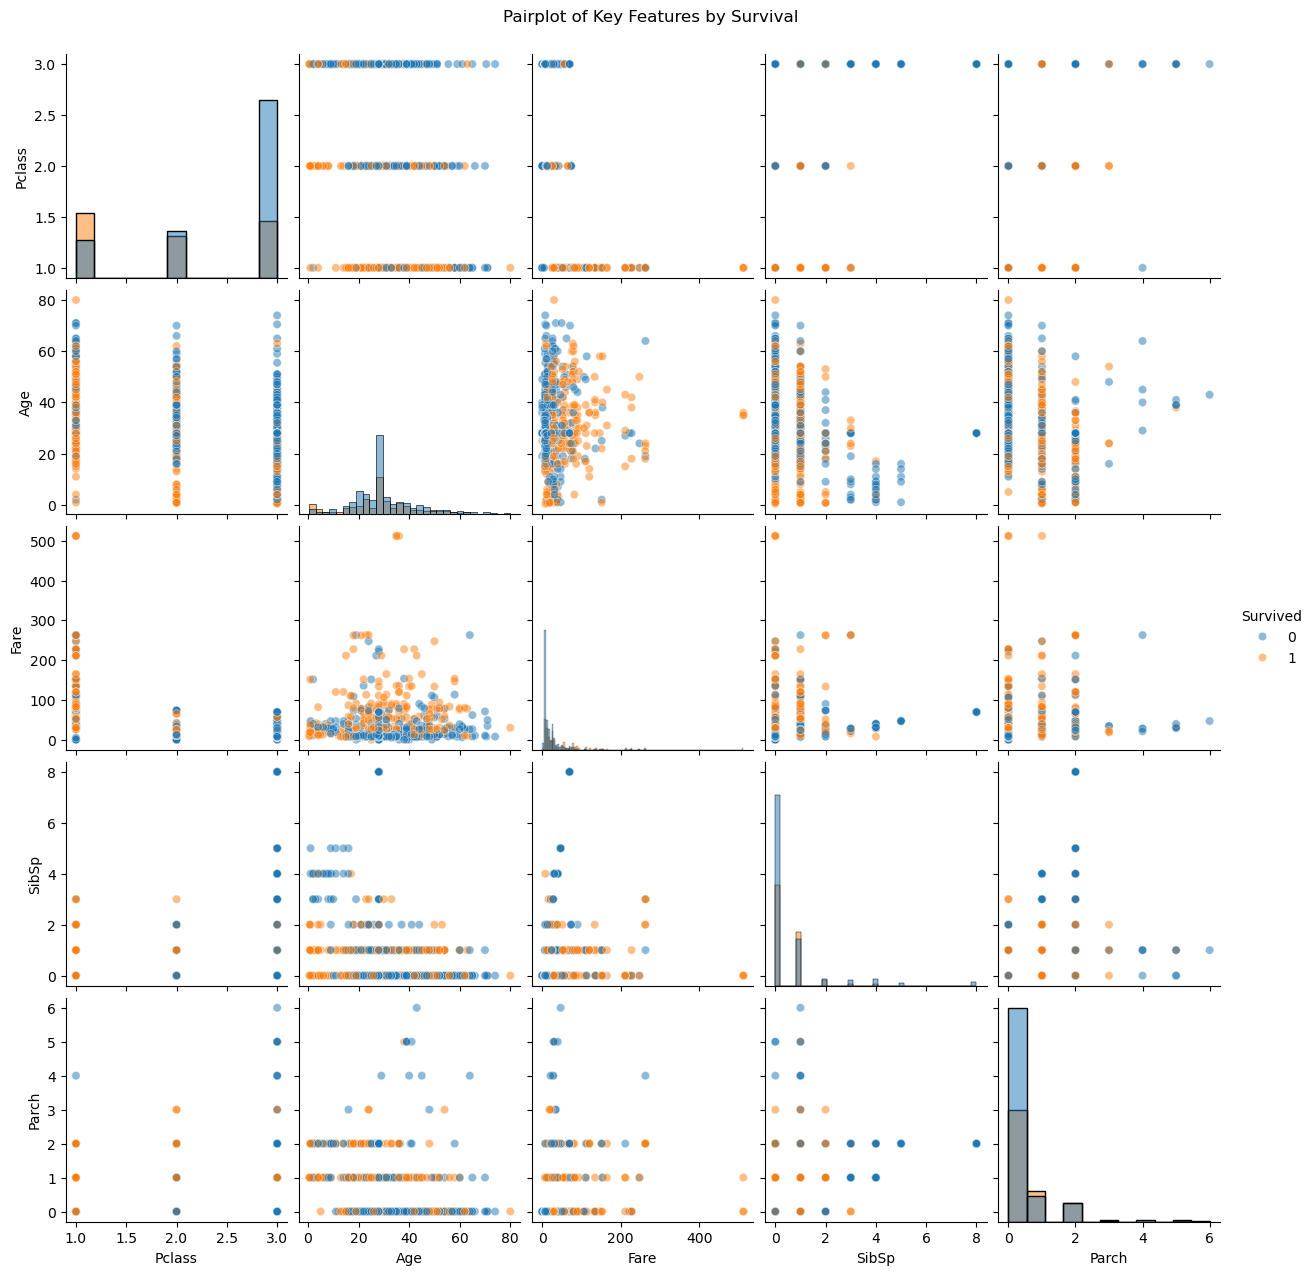

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch"]

sns.pairplot(
    df[cols],
    hue="Survived",
    diag_kind="hist",         # histograms on diagonal
    plot_kws={"alpha": 0.5}   # make points semi-transparent
)
plt.suptitle("Pairplot of Key Features by Survival", y=1.02)
plt.show()


# KEY RELATIONSHIPS
#### Pclass & Survival: Most survivors (orange) are in Pclass 1, whereas Pclass 3 has the lowest survival density.

#### Fare & Survival: Survivors tend to cluster at higher fare values; non-survivors dominate the lower-fare range.

#### Age & Survival: Survival is spread across ages, but there’s a slight over-representation of very young passengers among survivors.

#### Family Size (SibSp/Parch) & Survival: Passengers with 1–2 siblings/spouses or parents/children aboard show marginally better survival than larger groups.

#### Pclass & Fare: Clear separation—Pclass 1 pays the highest fares, Pclass 3 the lowest, reinforcing class-fare linkage.

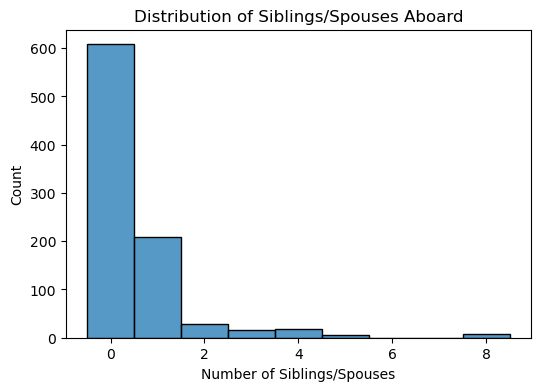

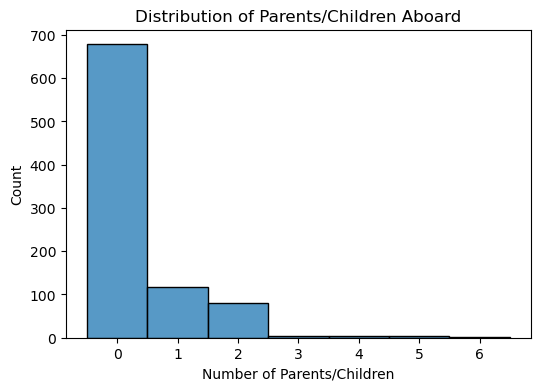

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Siblings/Spouses aboard
plt.figure(figsize=(6,4))
sns.histplot(df['SibSp'], discrete=True, kde=False)
plt.title('Distribution of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

# Parents/Children aboard
plt.figure(figsize=(6,4))
sns.histplot(df['Parch'], discrete=True, kde=False)
plt.title('Distribution of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.show()


# Observations:

### Siblings/Spouses Aboard (SibSp)
#### Majority Travelled Alone: Over 600 passengers (~75%) had 0 siblings or spouses on board.
#### Small Groups Common: The next largest group (~200) had 1 sibling/spouse. Very few (≈30) had 2, and counts drop sharply beyond that.
#### Large Sibling Groups Rare: Only a handful traveled with 4–8 siblings/spouses.
### Parents/Children Aboard (Parch)
#### Mostly Solo Adults: Around 680 passengers (~80%) had 0 parents or children aboard.
#### Small Family Units: Approximately 110 had 1 parent/child, and about 80 had 2.
#### Very Few Large Families: Almost no passengers (>5) traveled with more than two direct dependents.

####  Takeaway: Most passengers sailed without family members or only one, suggesting many solo travelers or small family groups. Larger family contingents were quite rare.


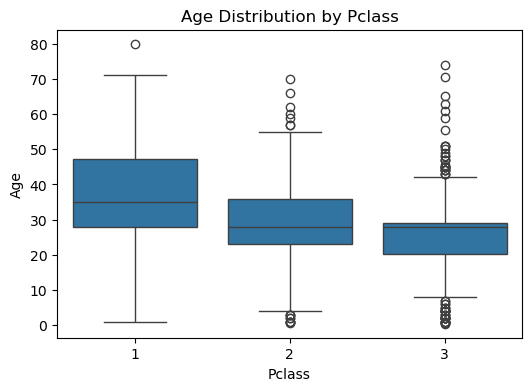

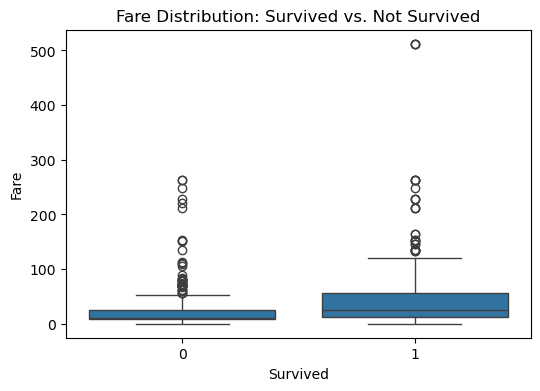

In [26]:
# Age by Passenger Class
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# Fare by Survival
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution: Survived vs. Not Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


# Key Observations:

### Age Distribution by Pclass:
#### Median Age Rises with Class: First-class passengers (Pclass 1) have the highest median age, followed by Pclass 2, then Pclass 3.
#### Wider Age Spread in Pclass 1: There are more older outliers among first-class, while third-class skews younger.
#### Younger Majority in Lower Classes: The bulk of Pclass 3 passengers fall in a younger age bracket compared to higher classes.
### Fare Distribution: Survived vs. Not Survived:
#### Survivors Paid More: The median fare for survivors is noticeably higher than for non-survivors.
#### Greater FareVariability: Survivors exhibit a wider interquartile range and more high-fare outliers, suggesting first-class passengers were more likely to survive.
#### Low-Fare Concentration Among Non-Survivors: Non-survivors’ fares are tightly clustered at the lower end, reinforcing the link between fare (and thus class) and survival.

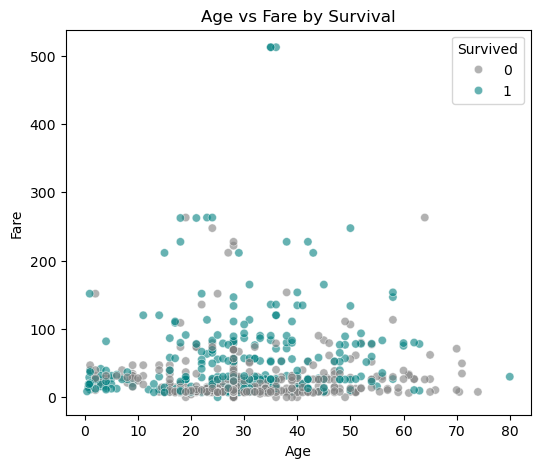

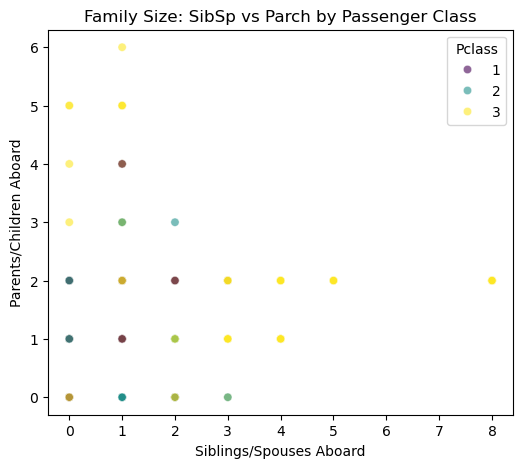

In [27]:
# Age vs Fare, colored by Survival
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='Age', y='Fare',
    hue='Survived',
    palette={0:'gray', 1:'teal'},
    alpha=0.6,
    data=df
)
plt.title('Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# SibSp vs Parch, colored by Pclass
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='SibSp', y='Parch',
    hue='Pclass',
    palette='viridis',
    alpha=0.6,
    data=df
)
plt.title('Family Size: SibSp vs Parch by Passenger Class')
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Parents/Children Aboard')
plt.show()


# Observations:

### Age vs. Fare by Survival

#### Higher fares, higher survival: Teal points (survived) cluster more in the upper-fare range, confirming that passengers who paid more were likelier to survive.

#### Young & premium outliers: A handful of very young (≤10 yrs) and older (≥60 yrs) passengers paid high fares and survived—suggesting first-class children and seniors.

#### Broad age spread at low fares: Most non-survivors (gray) occupy the lower-fare band across all ages, indicating fare (class) was a stronger survival driver than age.

###  SibSp vs. Parch by Passenger Class

#### Class 1 (dark purple): Largely near (0,0) or (1,1) — small or no family aboard.

#### Class 2 (greenish): Moderate family sizes, typically SibSp≤2 and Parch≤2.

#### Class 3 (yellow): Shows the widest spread—some travelers with up to 8 siblings/spouses or 6 parents/children, indicating larger families predominantly in third class.